In [1]:
import fastf1.plotting
import f1analytics as f1

In [14]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(color_scheme='fastf1' )

session_year = 2025
session_name = "Italian Grand Prix"
session_type = 'FP1'


# load a session and its telemetry data
session = fastf1.get_session(session_year, session_name, session_type)
session.load()
# In this way i Can exclude the box laps
laps = session.laps

results = session.results

circuit_info = session.get_circuit_info()

weather = session.weather_data



core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 3
core        WARNING 	No lap data for driver 7
core        WARNING 	No lap data for driver 9
core        WARNING 	No lap data for driver 11
core        WARNING 	No lap data for driver 15
core        WARNING 	No lap data for driver 17
core        WARNING 	No lap data for driver 19
core        WARNING 	No lap data for driver 21
core        WARNING 	No lap d

In [15]:
t = f1.telemetry.Telemetry(
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

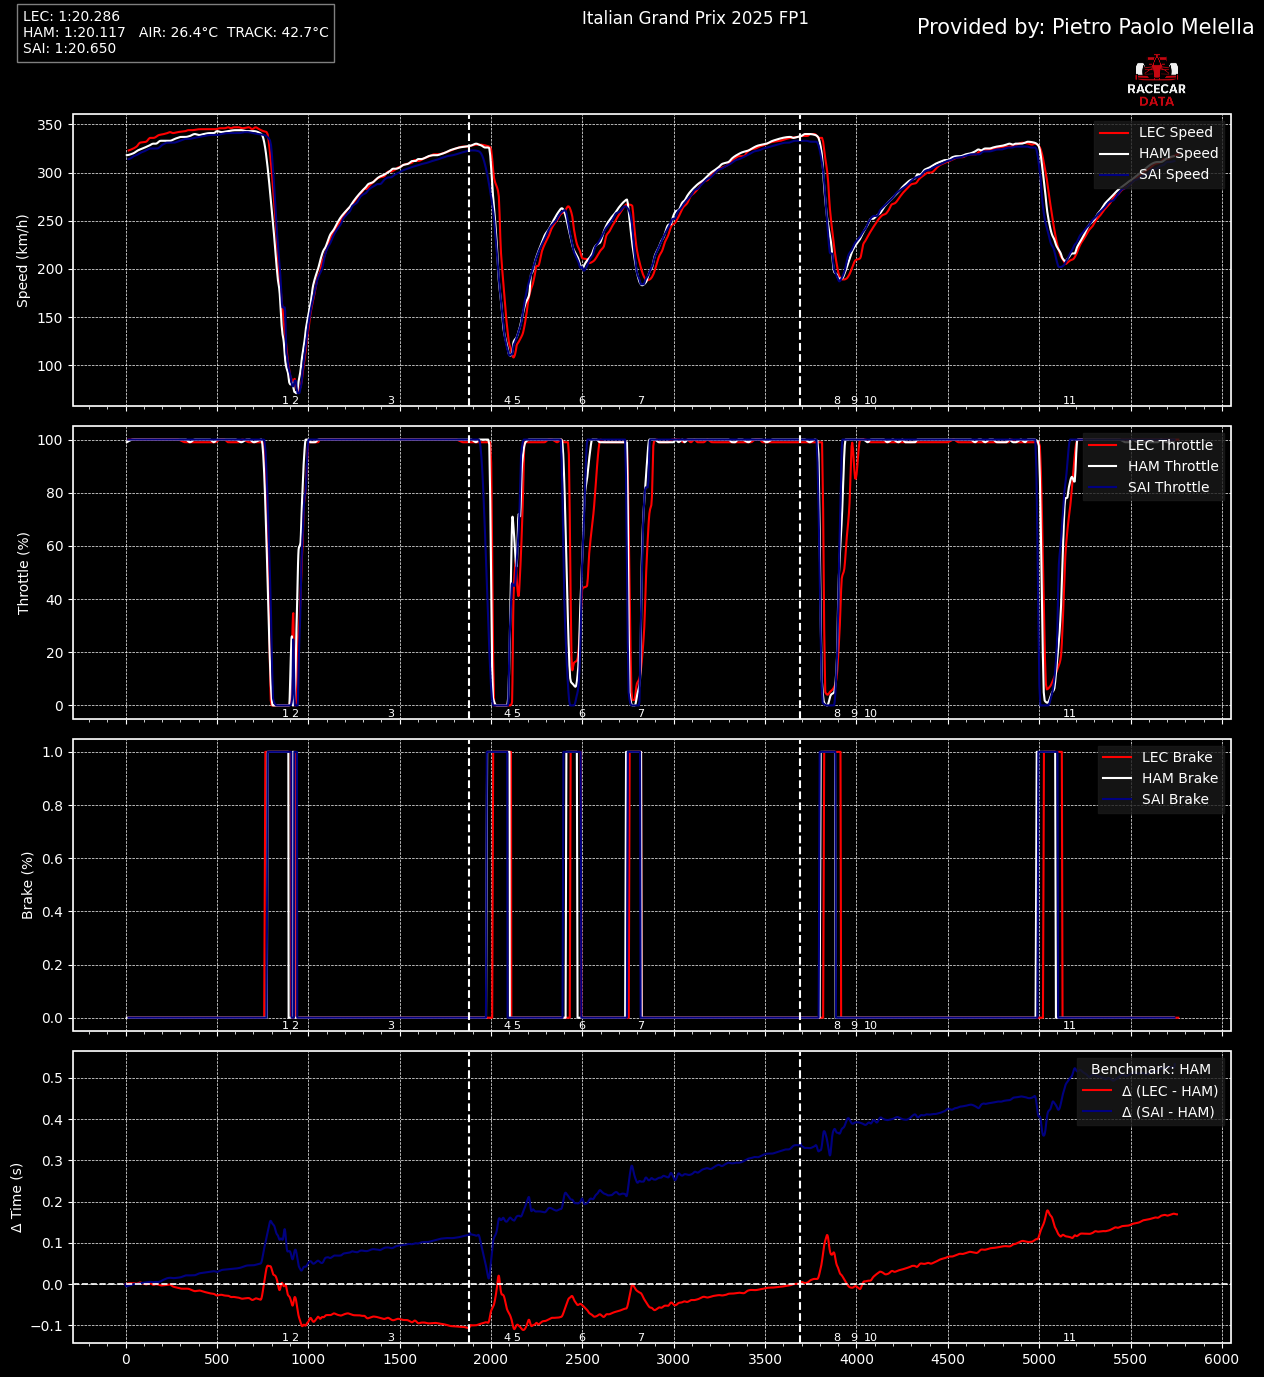

In [20]:
t.compare_laps(
    drivers={'LEC': 'fastest', 'HAM': 'fastest', 'SAI': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

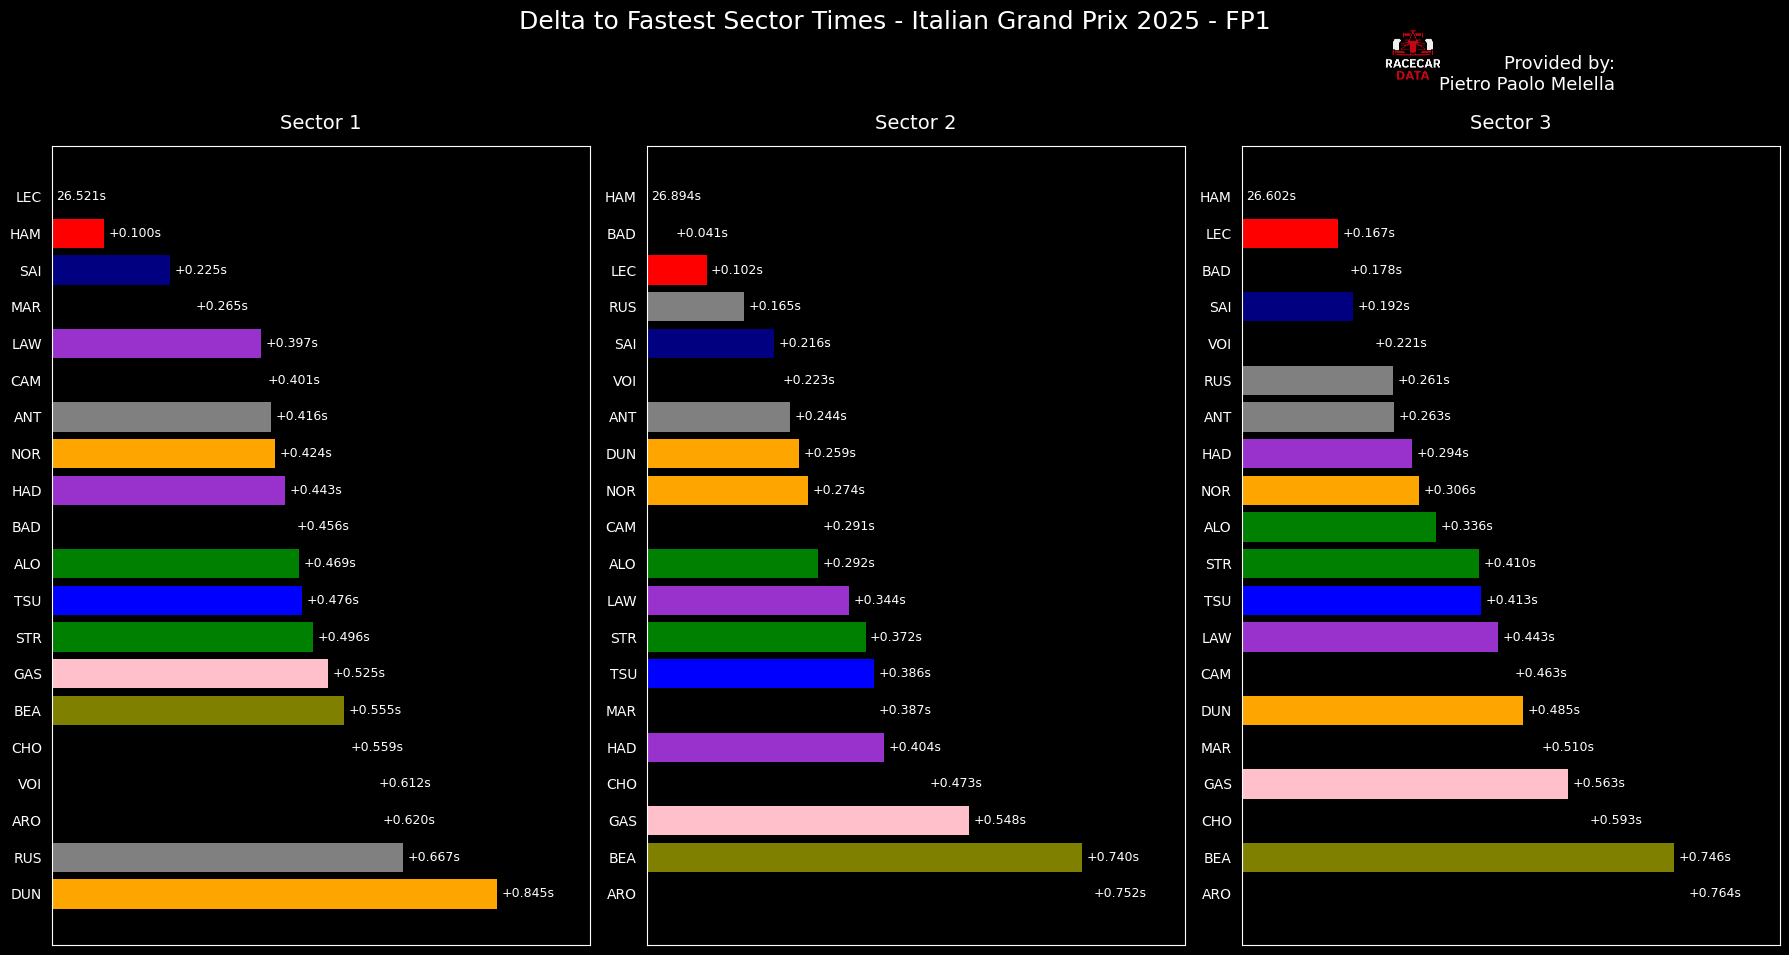

In [22]:
sd = f1.fastest_sectors_deltas.SectorDeltaPlotter(
    session, session_name, session_year, session_type
)
sd.plot()

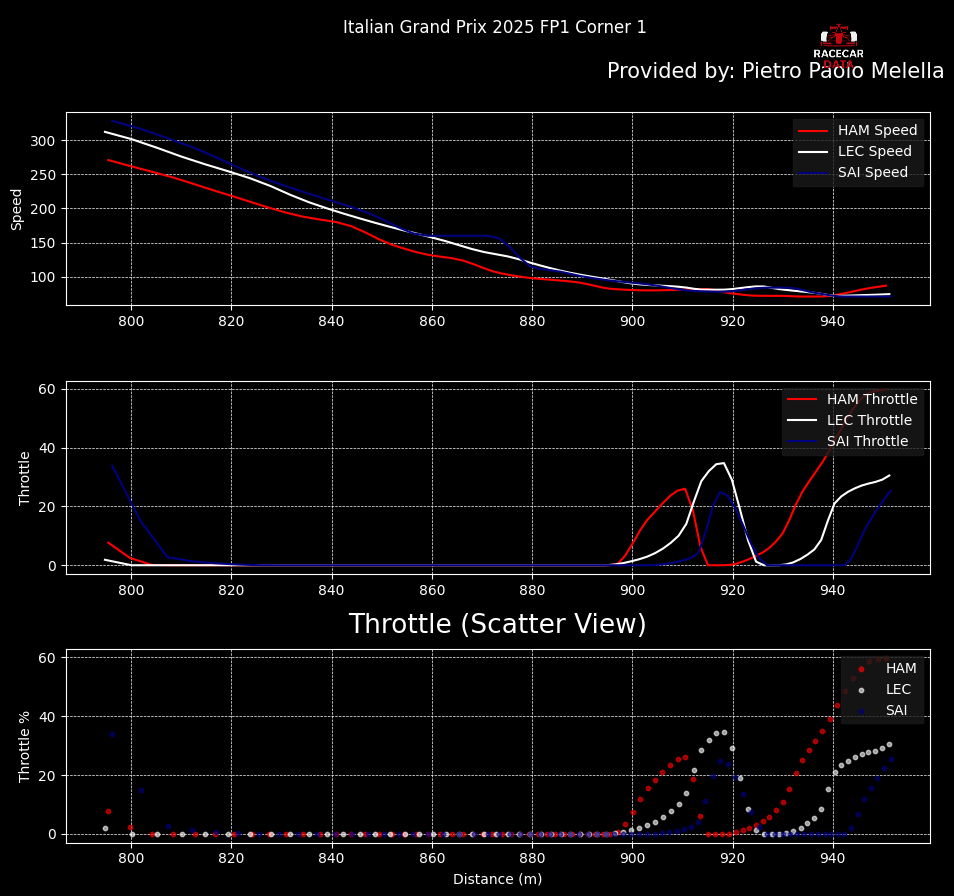

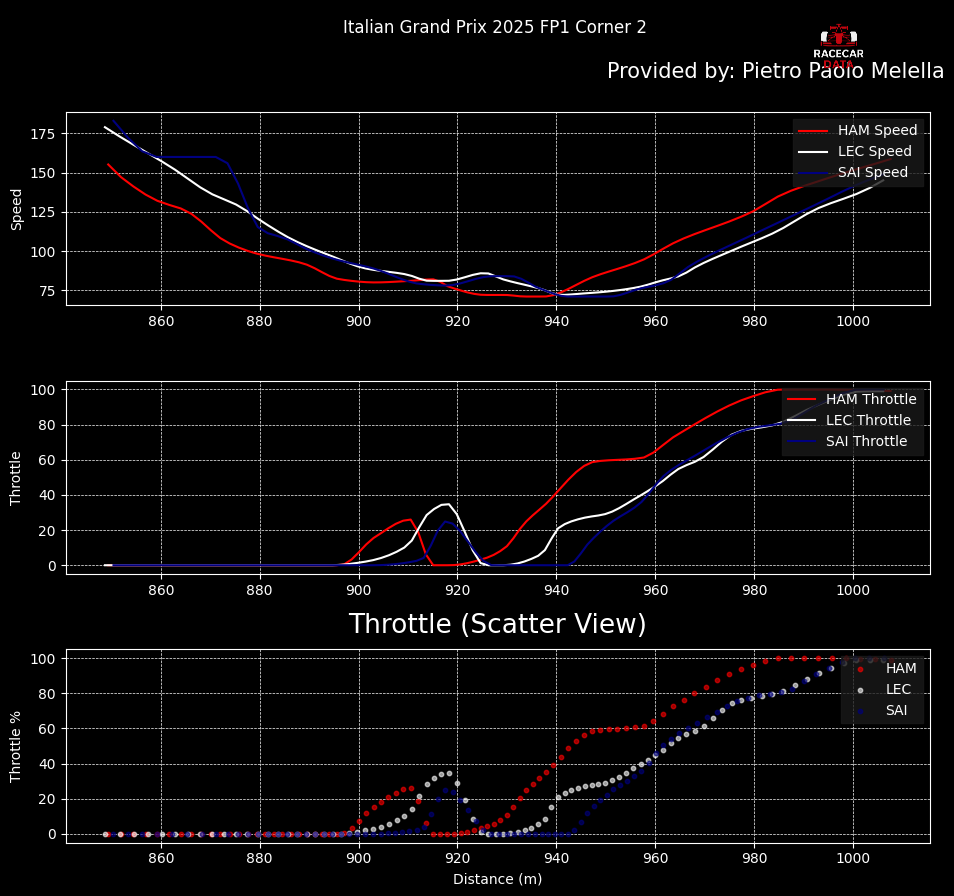

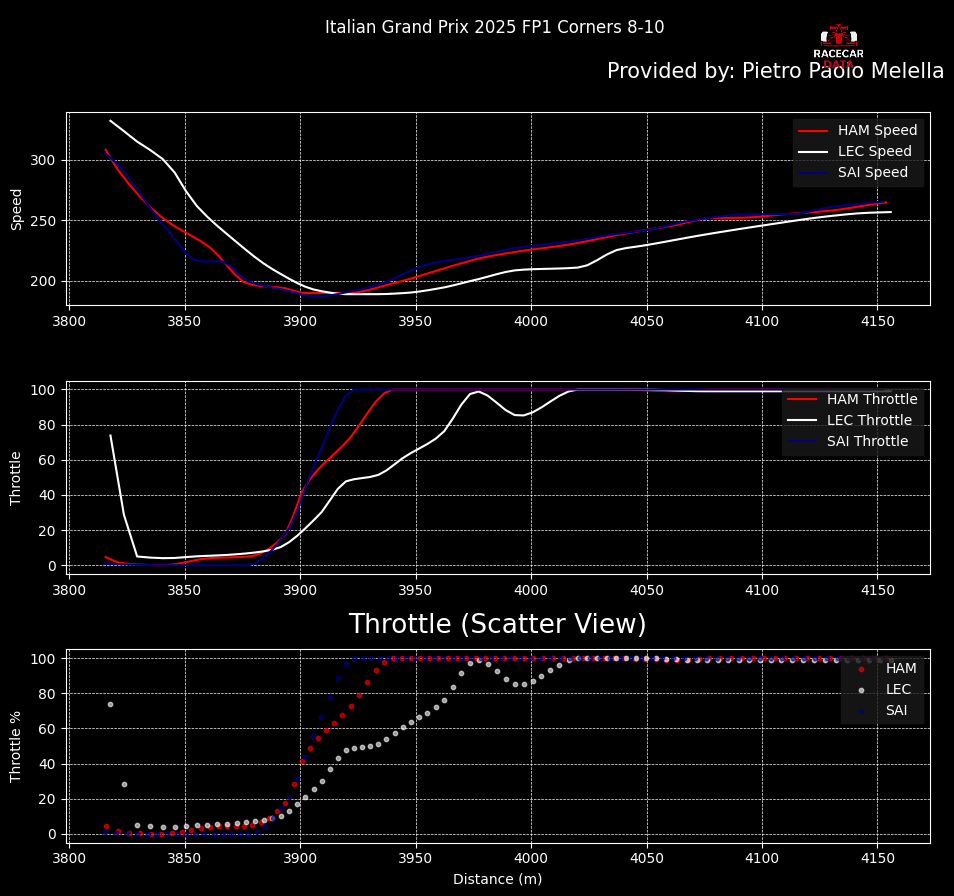

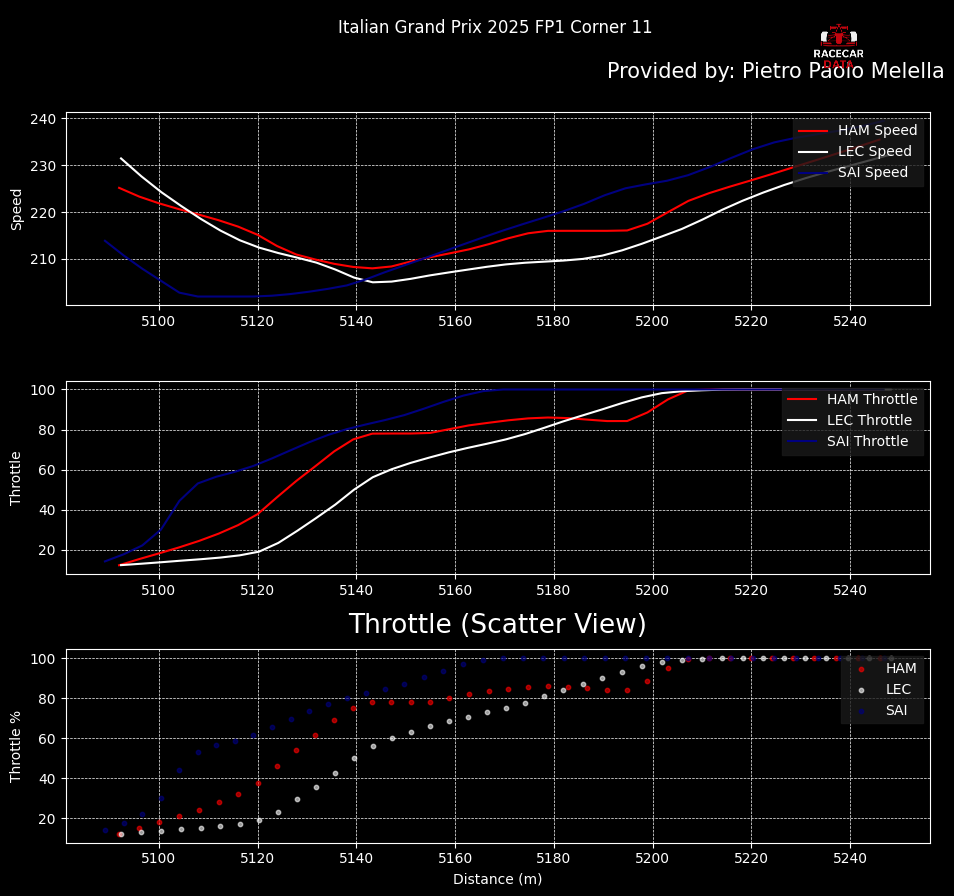

In [23]:
corners = [1,2,[8,9,10], 11]
for corner in corners:
    ca = f1.corner_analysis.CornerAnalysis(
        session, session_name, session_year, session_type,
        drivers={'HAM': 'fastest', 'LEC': 'fastest', 'SAI': 'fastest'},
        corner_idxs=[corner], before=80, after=80
    )
    ca.plot_all(['Speed', 'Throttle' ])

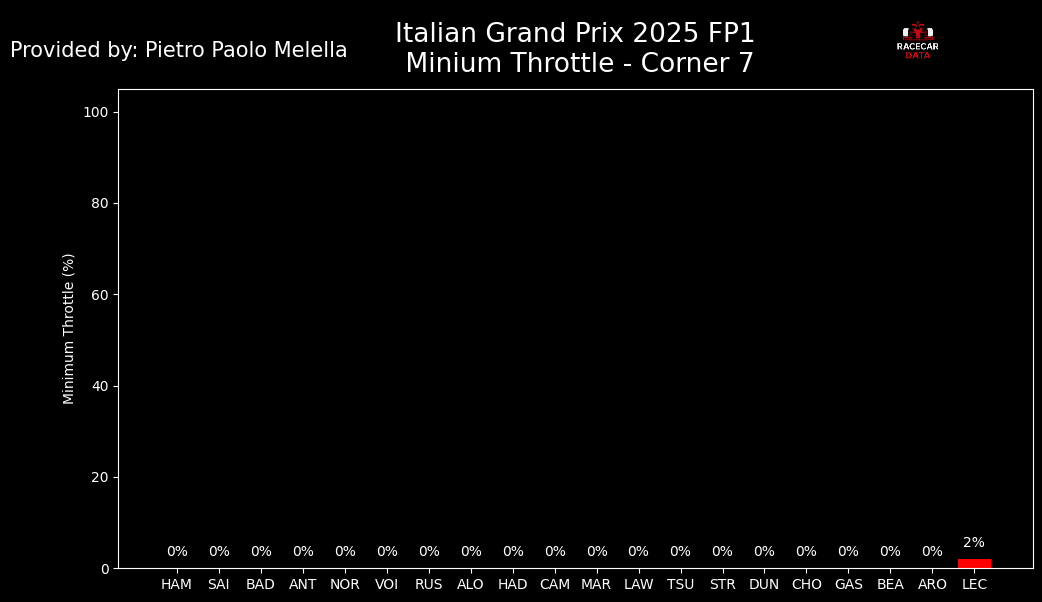

In [24]:
mtc = f1.min_throttle_corner.CornerMinThrottle(
    session, session_name, session_year, session_type,
    corner_idxs=[7], after=50, before=50, n_drivers=20
).plot()

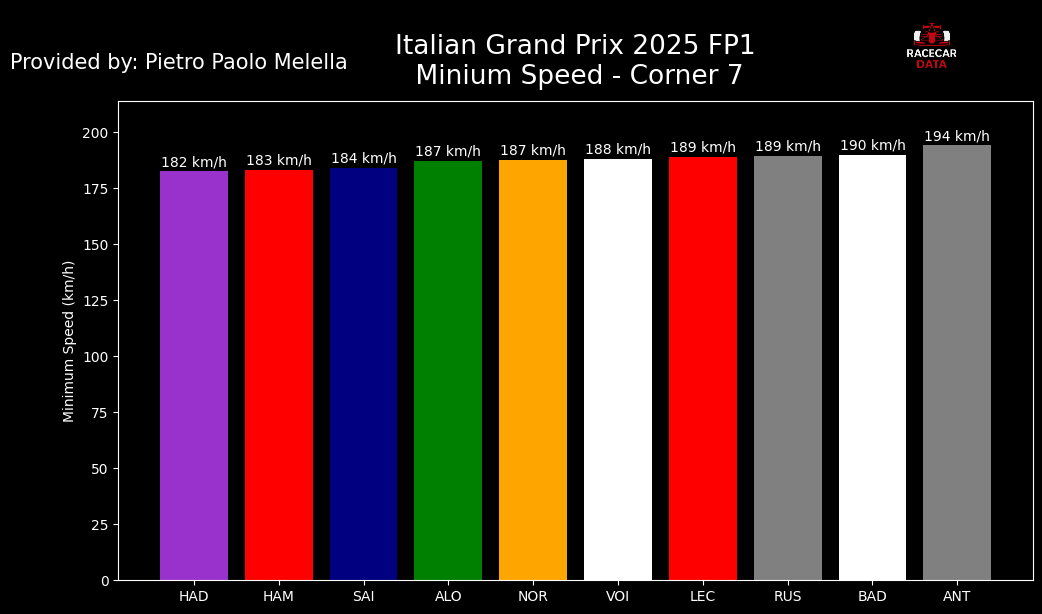

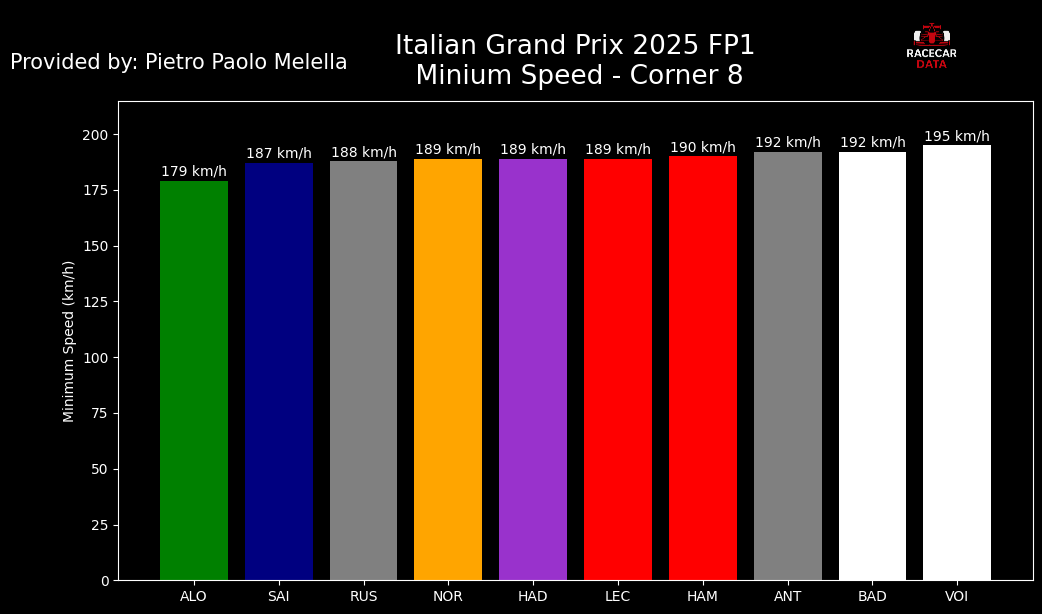

In [25]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[7], after=30, before=30, n_drivers=10
).plot()

msc2 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[8], after=30, before=30, n_drivers=10
).plot()

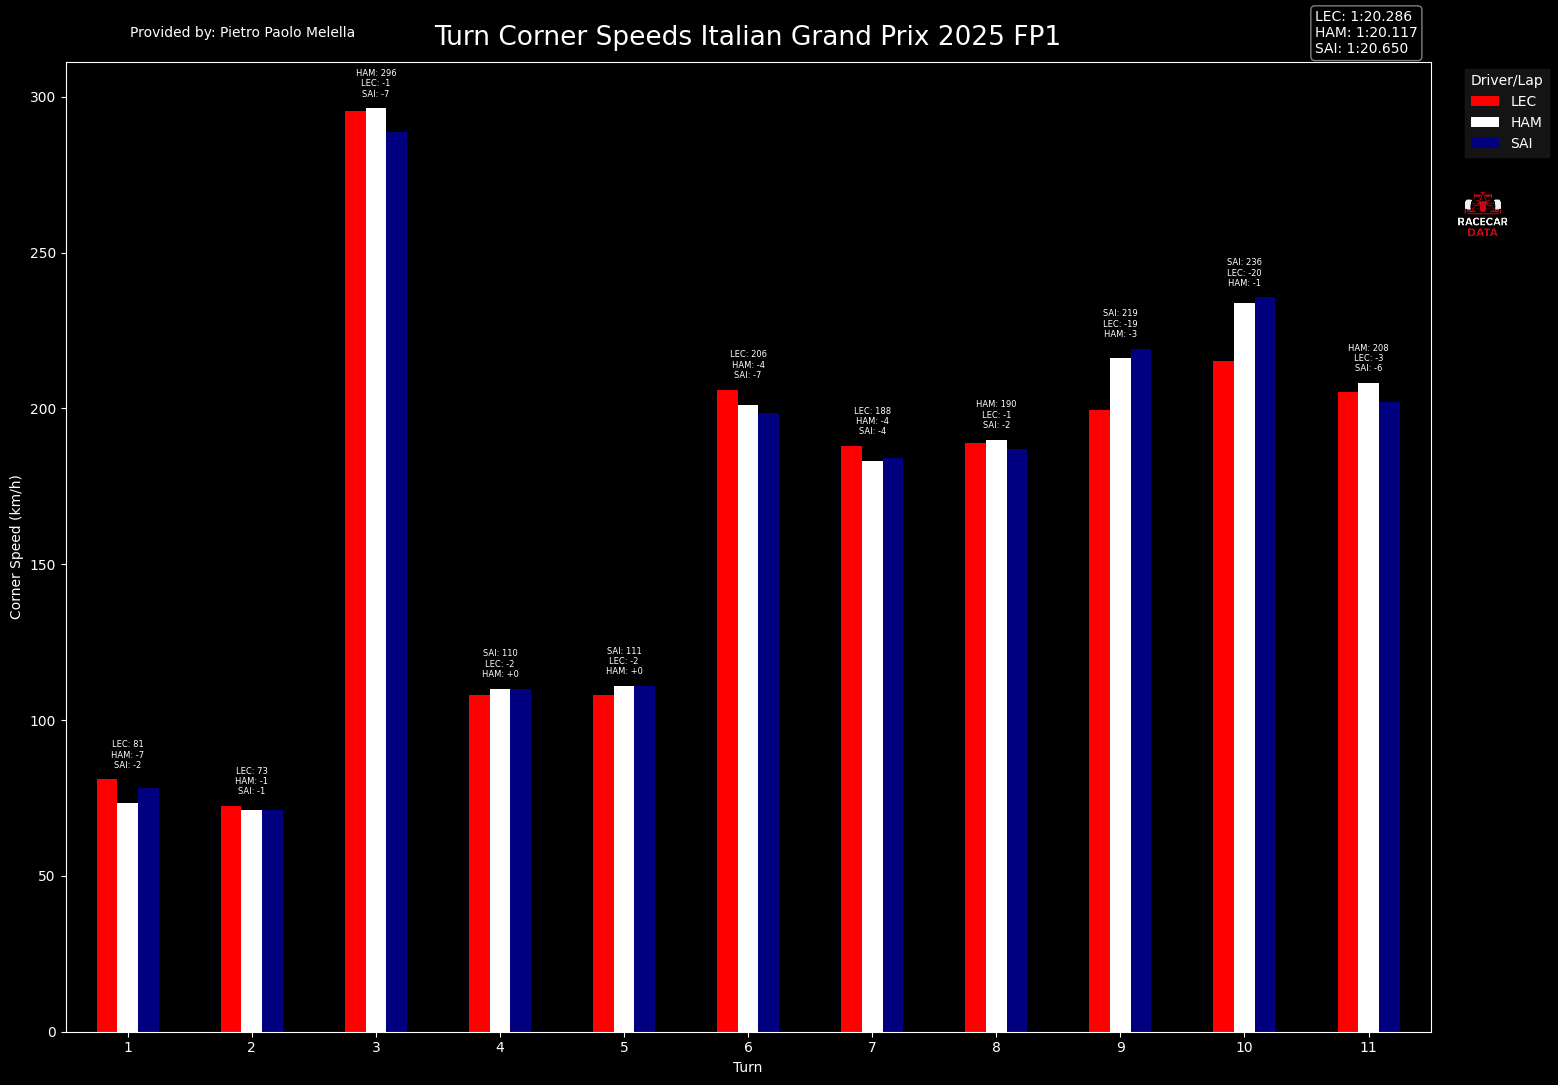

In [27]:
csc = f1.corner_speed.CornerSpeedComparator(
    drivers={'LEC': 'fastest', 'HAM': 'fastest','SAI': 'fastest'},
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
).plot_peak_speeds()

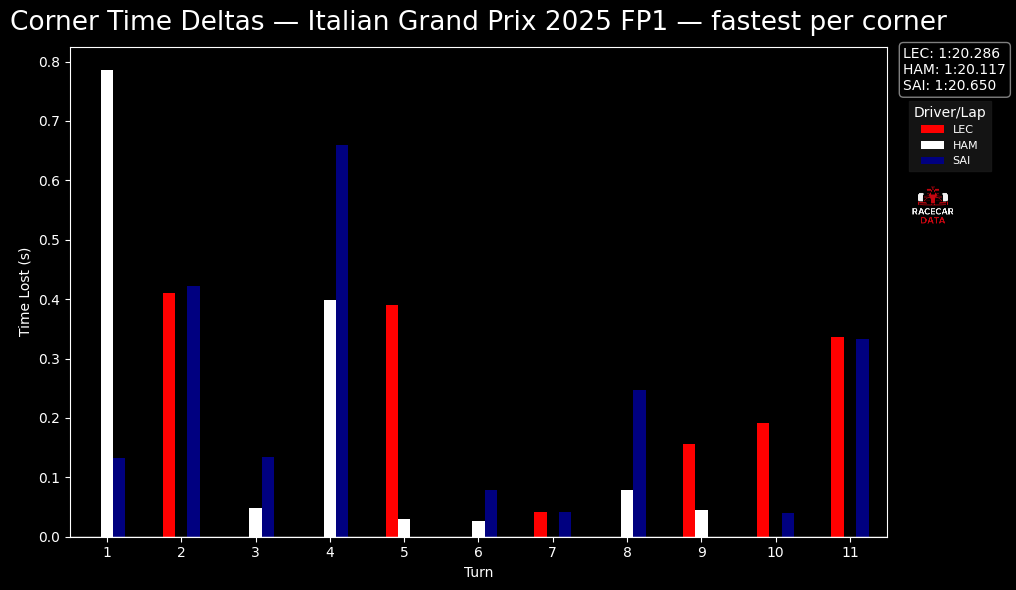

In [28]:
cmp = f1.corner_time_comparator.CornerTimeComparator(
    drivers=[('LEC','fastest'), ('HAM','fastest'), ('SAI','fastest')],
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')

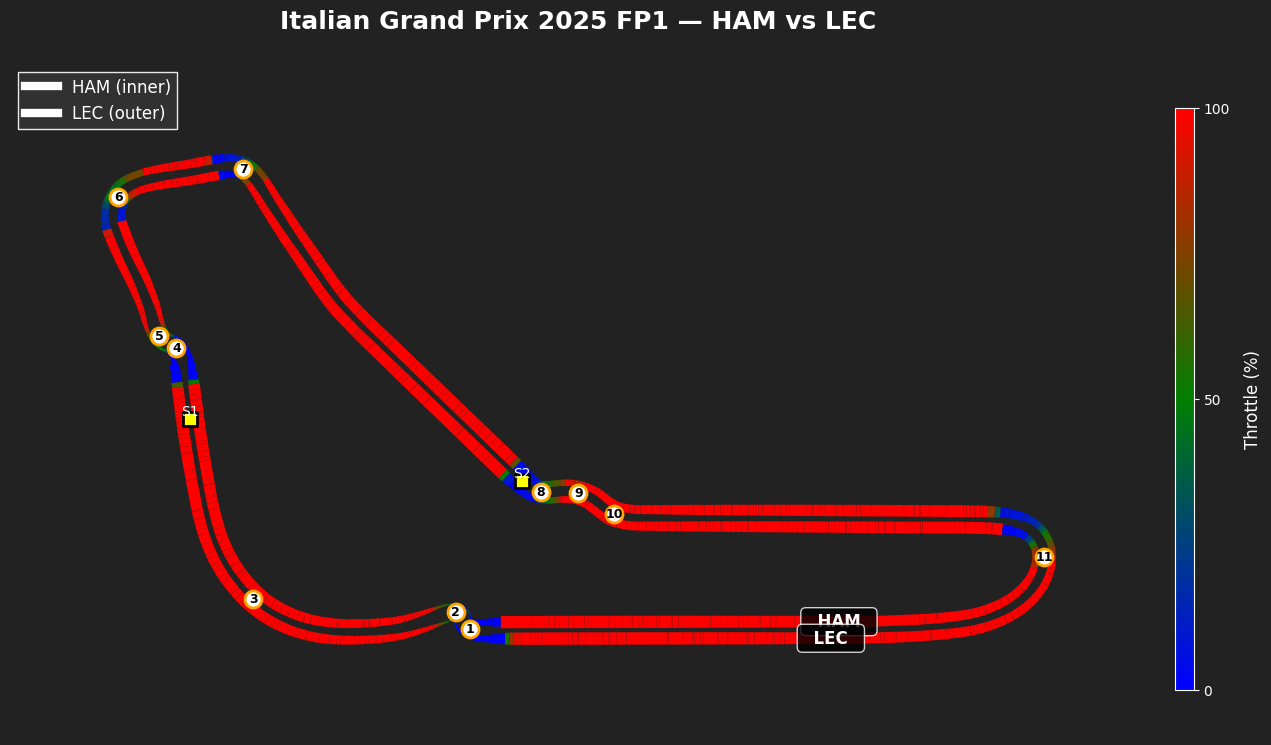

In [35]:
visualizer = f1.dual_throttle_compare.DualThrottleComparisonVisualizer(
    laps=laps,
    circuit_info=session.get_circuit_info(),
    reference_driver='HAM',      # Red line
    comparison_driver='LEC',     # Blue line
    offset_distance=200,       # Distance between parallel lines
    event_name=session_name,
    year=session_year,
    session_name=session_type,
    annotate_sectors=True,
)

visualizer.plot()